In [1]:
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Chemin vers la racine du projet
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # remonte d'un dossier
data_path = os.path.join(project_root, 'data')

print("Chemin vers data :", data_path)


Chemin vers data : /home/jupyter/Fatma_Aziz/movie_recommender/data


In [2]:
# Charger train, test et movies
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test_ratings.csv'))
df_movies = pd.read_csv(os.path.join(data_path, 'movies.csv'))

# Vérifier
print("Train shape :", train_df.shape)
print("Test shape  :", test_df.shape)
print("Movies shape:", df_movies.shape)


Train shape : (84271, 6)
Test shape  : (21068, 6)
Movies shape: (10329, 5)


In [3]:
# chargemnt des encoder et décoder 
import pickle

with open(os.path.join(data_path, 'user_encoder.pkl'), 'rb') as f:
    user_encoder = pickle.load(f)

with open(os.path.join(data_path, 'movie_encoder.pkl'), 'rb') as f:
    movie_encoder = pickle.load(f)


In [7]:
# user_idx et movie_idx sont déjà créés
user_movie_matrix = train_df.pivot(index='user_idx', columns='movie_idx', values='rating')

# Affichage rapide
print(user_movie_matrix.head())

movie_idx  0      1      2      3      4      5      6      7      8      \
user_idx                                                                   
0            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            5.0    NaN    2.0    NaN    3.0    NaN    NaN    NaN    NaN   
2            NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN   
3            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4            4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movie_idx  9      ...  10315  10316  10317  10318  10319  10320  10321  10322  \
user_idx          ...                                                           
0            NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2            NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3            NaN  ...    NaN    NaN    NaN    NaN    NaN    Na

In [8]:
# Remplacer les NaN par 0 pour calculer la similarité
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Similarité entre utilisateurs
user_similarity = cosine_similarity(user_movie_matrix_filled)

# Convertir en DataFrame pour plus de clarté
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_movie_matrix.index, 
                                  columns=user_movie_matrix.index)

In [9]:
user_movie_matrix_filled.head(100)

movie_idx,0,1,2,3,4,5,6,7,8,9,...,10315,10316,10317,10318,10319,10320,10321,10322,10323,10324
user_idx,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,4.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Baseline model(modèle naif)
# Moyenne des ratings par film
mean_ratings = user_movie_matrix.mean(axis=0)  # moyenne colonne par colonne (chaque film)

# Trier par ordre décroissant
mean_ratings_sorted = mean_ratings.sort_values(ascending=False)

# Afficher les 10 premiers
print(mean_ratings_sorted.head(10))


movie_idx
1632     5.0
10118    5.0
7362     5.0
9426     5.0
810      5.0
9440     5.0
7225     5.0
6895     5.0
6890     5.0
6783     5.0
dtype: float64


# Création et test des modèles 

In [11]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Trainset
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Définir le format des données
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))

# Charger directement le trainset
train_data = Dataset.load_from_df(train_df[['user_idx', 'movie_idx', 'rating']], reader)
trainset = train_data.build_full_trainset()  # Utilise tout train_df

# Charger directement le testset (test_df)
testset = list(zip(test_df['user_idx'], test_df['movie_idx'], test_df['rating']))

In [17]:
# Créer et entraîner le modèle
model_svd = SVD()
model_svd.fit(trainset)

# Prédictions sur test set
predictions = model_svd.test(testset)

# RMSE
rmse = accuracy.rmse(predictions)
print("RMSE sur le test set:", rmse)

RMSE: 0.8732
RMSE sur le test set: 0.8732373831964244


In [18]:
# Matrice prédite
n_users = train_df['user_idx'].nunique()
n_movies = train_df['movie_idx'].nunique()

pred_matrix = np.zeros((n_users, n_movies))

for uid in range(n_users):
    for iid in range(n_movies):
        pred_matrix[uid, iid] = model_svd.predict(uid, iid).est
        
pred_df = pd.DataFrame(pred_matrix, 
                       index=[f"User {uid}" for uid in range(n_users)],
                       columns=df_movies['title'].values[:n_movies])  # limiter au nombre de films entraînés

# Afficher les 10 premières lignes et colonnes
print(pred_df.iloc[:10, :10])

        Li'l Quinquin (    )  Pablo (2012)  The Big Broadcast of 1936 (1935)  \
User 0              3.220079      3.145150                          2.701899   
User 1              4.331208      3.754105                          3.287756   
User 2              4.221354      3.565388                          3.329843   
User 3              4.195052      3.509629                          3.452591   
User 4              3.760934      3.267160                          2.945226   
User 5              4.142040      3.847695                          3.619482   
User 6              3.717023      3.372235                          3.070767   
User 7              4.173241      3.839306                          3.641118   
User 8              2.921634      2.478805                          2.505660   
User 9              3.789400      3.226974                          3.149948   

        Round Trip to Heaven (1992)  The 50 Year Argument (2014)  \
User 0                     2.892761                

In [22]:
# recommandation for users filtrage collaboratif basé sur un modèle (Model-Based CF)
def svd_based_recommandation(user_id, top_n=5):
    # Tous les movie_idx vus par l'utilisateur
    movies_watched = train_df[train_df['user_idx']==user_id]['movie_idx'].tolist()

    # Tous les movie_idx connus par le modèle
    all_movie_idx = list(movie_encoder.transform(movie_encoder.classes_))

    pred_for_user = []

    for movie_idx in all_movie_idx:
        if movie_idx not in movies_watched:
            pred_rating = model_svd.predict(user_id, movie_idx).est
            pred_for_user.append((movie_idx, pred_rating))

    # Trier par note prédite décroissante
    top_recommendations = sorted(pred_for_user, key=lambda x: x[1], reverse=True)[:5]

    # Afficher
    print("Top 5 recommandations pour user", user_id)
    for movie_idx, rating in top_recommendations:
        movie_id = movie_encoder.inverse_transform([movie_idx])[0]
        title = df_movies[df_movies['movieId']==movie_id]['title'].values[0]
        print(f"{title} - predicted rating: {rating:.2f}")
        
    return sorted(pred_for_user, key=lambda x: x[1], reverse=True)[:top_n]


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
def users_close(user_idx, k=15):
    user_similarity = cosine_similarity(pred_matrix)
    
    user_similarity_df = pd.DataFrame(
        user_similarity,
        index=all_user_ids,
        columns=all_user_ids
    )
    
    closest_users = (
        user_similarity_df[user_idx]
        .sort_values(ascending=False)
        .iloc[1:k+1]   # on enlève l'utilisateur lui-même
    )
    
    return closest_users


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Matrice utilisateur × film
user_movie_matrix = train_df.pivot(
    index='user_idx',
    columns='movie_idx',
    values='rating'
)

# 2. Similarité utilisateur-utilisateur
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)
user_similarity_df

user_idx,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,667
user_idx,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.085018,0.137298,0.076770,0.057687,0.070284,0.293890,0.080078,0.211653,0.012170,...,0.239910,0.150488,0.084427,0.084494,0.172469,0.124288,0.204717,0.181632,0.263143,0.108430
1,0.085018,1.000000,0.095866,0.041178,0.038769,0.036130,0.055579,0.367086,0.191174,0.000000,...,0.051961,0.000000,0.446125,0.116569,0.000000,0.051657,0.044368,0.037494,0.023029,0.052403
2,0.137298,0.095866,1.000000,0.027356,0.049579,0.016802,0.056892,0.057597,0.332073,0.042302,...,0.128851,0.296620,0.049218,0.091147,0.178744,0.045042,0.049739,0.031314,0.151290,0.094998
3,0.076770,0.041178,0.027356,1.000000,0.019368,0.000000,0.041906,0.030004,0.040753,0.000000,...,0.041601,0.031482,0.033681,0.107385,0.048927,0.000000,0.025258,0.128941,0.052718,0.130726
4,0.057687,0.038769,0.049579,0.019368,1.000000,0.069507,0.038865,0.050847,0.021487,0.014627,...,0.050619,0.009431,0.019731,0.044627,0.044785,0.055312,0.040129,0.021327,0.084246,0.055814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.124288,0.051657,0.045042,0.000000,0.055312,0.008063,0.169785,0.074102,0.077166,0.040603,...,0.113504,0.088356,0.062645,0.054267,0.106294,1.000000,0.099901,0.057721,0.119922,0.082160
664,0.204717,0.044368,0.049739,0.025258,0.040129,0.081127,0.150951,0.016972,0.080685,0.022319,...,0.154402,0.078923,0.021169,0.042485,0.117882,0.099901,1.000000,0.083545,0.169843,0.142091
665,0.181632,0.037494,0.031314,0.128941,0.021327,0.030577,0.136551,0.046834,0.061599,0.002694,...,0.106237,0.052120,0.016356,0.094287,0.043313,0.057721,0.083545,1.000000,0.064604,0.119677


# Evaluation et comparaison des modèles 

In [26]:
results = []

import time
from surprise import accuracy

def evaluate_model(name, algo, trainset, testset, model_type):
    print(f"Evaluating {name}...")
    
    # Temps d'entraînement
    start_train = time.time()
    algo.fit(trainset)
    train_time = time.time() - start_train

    # Temps de prédiction
    start_test = time.time()
    predictions = algo.test(testset)
    test_time = time.time() - start_test

    # Métriques
    rmse = accuracy.rmse(predictions, verbose=False)
    mae = accuracy.mae(predictions, verbose=False)

    results.append({
        "model": name,
        "type": model_type,
        "rmse": rmse,
        "mae": mae,
        "train_time_sec": round(train_time, 2),
        "test_time_sec": round(test_time, 2)
    })


In [27]:
from surprise import BaselineOnly, SVD, SVDpp, KNNBasic, KNNWithMeans
# Baseline
evaluate_model("BaselineOnly", BaselineOnly(), trainset, testset, model_type="Baseline")
# Mémoire - KNN basic
evaluate_model("KNNBasic", KNNBasic(sim_options={'name':'cosine','user_based':True}), trainset, testset,model_type="Memory-based")
# Mémoire - KNN avec moyennes
evaluate_model("KNNWithMeans", KNNWithMeans(sim_options={'name':'cosine','user_based':True}), trainset, testset,model_type="Memory-based")
# Factorisation - SVD
evaluate_model("SVD", SVD(random_state=42), trainset, testset,model_type="Matrix Factorization")
# Factorisation - SVD++
evaluate_model("SVD++", SVDpp(random_state=42), trainset, testset,model_type="Matrix Factorization")

Evaluating BaselineOnly...
Estimating biases using als...
Evaluating KNNBasic...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNWithMeans...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating SVD...
Evaluating SVD++...


In [28]:
results_df = pd.DataFrame(results).sort_values("rmse")
results_df

,model,type,rmse,mae,train_time_sec,test_time_sec
4,SVD++,Matrix Factorization,0.862090,0.659308,145.86,14.12
0,BaselineOnly,Baseline,0.866050,0.666826,0.40,0.08
3,SVD,Matrix Factorization,0.869442,0.667213,1.56,0.11
2,KNNWithMeans,Memory-based,0.898459,0.687901,0.23,1.47
1,KNNBasic,Memory-based,0.988984,0.765106,0.19,1.35


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x="model", y="rmse", data=results_df)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xlabel("Model")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("model_comparison_rmse.png", dpi=300)
plt.close()


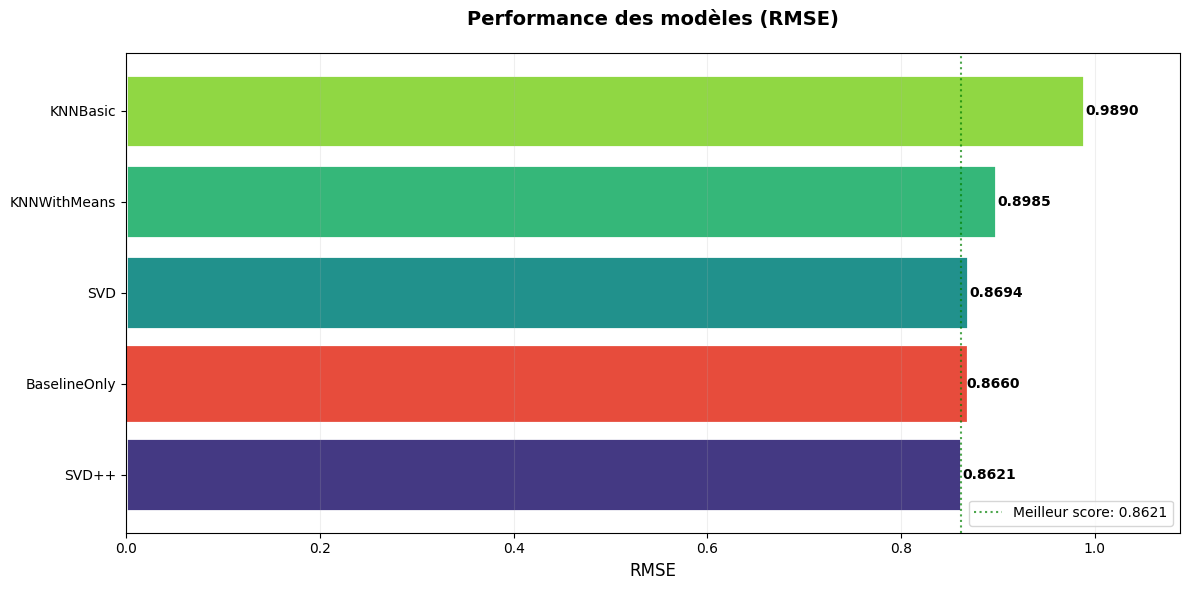

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style minimaliste
plt.style.use('default')
plt.figure(figsize=(12, 6))

# Palette de couleurs élégante
palette = sns.color_palette("viridis", len(results_df))

# Trier et créer le graphique
results_sorted = results_df.sort_values('rmse')
bars = plt.barh(results_sorted['model'], results_sorted['rmse'], 
                color=palette, edgecolor='white', linewidth=2)

# Ajouter les valeurs
for bar, rmse in zip(bars, results_sorted['rmse']):
    plt.text(rmse + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{rmse:.4f}', va='center', fontsize=10, fontweight='bold')

# Mettre en évidence le Baseline
if 'BaselineOnly' in results_sorted['model'].values:
    baseline_idx = list(results_sorted['model']).index('BaselineOnly')
    bars[baseline_idx].set_color('#E74C3C')
    bars[baseline_idx].set_alpha(1)

plt.title('Performance des modèles (RMSE)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('RMSE', fontsize=12)
plt.xlim(0, results_sorted['rmse'].max() * 1.1)

# Ajouter une ligne verticale pour le meilleur score
best_rmse = results_sorted['rmse'].min()
plt.axvline(x=best_rmse, color='green', linestyle=':', alpha=0.7, 
            label=f'Meilleur score: {best_rmse:.4f}')

plt.legend()
plt.grid(True, axis='x', alpha=0.2)
plt.tight_layout()
plt.savefig("model_comparison_elegant.png", dpi=300, bbox_inches='tight')
plt.show()


In [42]:
import numpy as np
from surprise import Dataset, Reader, accuracy

def evaluate_cold_start(algo, train_df, test_df, user_encoder, movie_encoder, cold_user_frac=0.05, cold_movie_frac=0.05, top_k=5):
    """
    Évalue un modèle sur cold start users / movies et top-k hit rate.
    """
    results = {}
    
    # 1️⃣ Préparer le trainset classique
    reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
    train_data = Dataset.load_from_df(train_df[['user_idx', 'movie_idx', 'rating']], reader)
    trainset = train_data.build_full_trainset()
    
    # 2️⃣ Préparer le testset classique
    testset = list(zip(test_df['user_idx'], test_df['movie_idx'], test_df['rating']))
    
    # Fit le modèle sur tout le trainset
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    # RMSE et MAE global
    results['rmse_warm'] = accuracy.rmse(predictions, verbose=False)
    results['mae_warm'] = accuracy.mae(predictions, verbose=False)
    
    # ---------------------------
    # Cold start utilisateurs
    # ---------------------------
    cold_users = np.random.choice(train_df['user_idx'].unique(), 
                                  size=int(cold_user_frac * train_df['user_idx'].nunique()), 
                                  replace=False)
    
    cold_user_testset = test_df[test_df['user_idx'].isin(cold_users)]
    if not cold_user_testset.empty:
        testset_cold_users = list(zip(cold_user_testset['user_idx'], cold_user_testset['movie_idx'], cold_user_testset['rating']))
        pred_cold_users = algo.test(testset_cold_users)
        results['rmse_cold_users'] = accuracy.rmse(pred_cold_users, verbose=False)
        results['mae_cold_users'] = accuracy.mae(pred_cold_users, verbose=False)
    
    # ---------------------------
    # Cold start films
    # ---------------------------
    cold_movies = np.random.choice(train_df['movie_idx'].unique(), 
                                   size=int(cold_movie_frac * train_df['movie_idx'].nunique()), 
                                   replace=False)
    
    cold_movie_testset = test_df[test_df['movie_idx'].isin(cold_movies)]
    if not cold_movie_testset.empty:
        testset_cold_movies = list(zip(cold_movie_testset['user_idx'], cold_movie_testset['movie_idx'], cold_movie_testset['rating']))
        pred_cold_movies = algo.test(testset_cold_movies)
        results['rmse_cold_movies'] = accuracy.rmse(pred_cold_movies, verbose=False)
        results['mae_cold_movies'] = accuracy.mae(pred_cold_movies, verbose=False)
    
    # ---------------------------
    # Hit Rate @ top_k (exemple simple)
    # ---------------------------
    hit_count = 0
    total_users = 0
    
    user_ids = test_df['user_idx'].unique()
    for uid in user_ids:
        # Films vus
        movies_watched = train_df[train_df['user_idx']==uid]['movie_idx'].tolist()
        all_movie_idx = list(movie_encoder.transform(movie_encoder.classes_))
        
        # Prédictions pour films non vus
        pred_for_user = [(iid, algo.predict(uid, iid).est) for iid in all_movie_idx if iid not in movies_watched]
        pred_for_user.sort(key=lambda x: x[1], reverse=True)
        top_k_movies = [iid for iid, _ in pred_for_user[:top_k]]
        
        # Hit si un vrai film du test set est dans top_k
        true_movies = test_df[test_df['user_idx']==uid]['movie_idx'].tolist()
        if any(f in top_k_movies for f in true_movies):
            hit_count += 1
        total_users += 1
    
    results['hit_rate_at_5'] = hit_count / total_users
    
    return results


In [43]:
from surprise import BaselineOnly, SVD, SVDpp, KNNBasic, KNNWithMeans

models = {
    "BaselineOnly": BaselineOnly(),
    "KNNBasic": KNNBasic(sim_options={'name':'cosine','user_based':True}),
    "KNNWithMeans": KNNWithMeans(sim_options={'name':'cosine','user_based':True}),
    "SVD": SVD(random_state=42),
    "SVD++": SVDpp(random_state=42)
}


In [44]:
all_results = []

for name, algo in models.items():
    print(f"Évaluation du modèle: {name}")
    res = evaluate_cold_start(
        algo=algo,
        train_df=train_df,
        test_df=test_df,
        user_encoder=user_encoder,
        movie_encoder=movie_encoder
    )
    res['model'] = name
    all_results.append(res)


Évaluation du modèle: BaselineOnly
Estimating biases using als...
Évaluation du modèle: KNNBasic
Computing the cosine similarity matrix...
Done computing similarity matrix.
Évaluation du modèle: KNNWithMeans
Computing the cosine similarity matrix...
Done computing similarity matrix.
Évaluation du modèle: SVD
Évaluation du modèle: SVD++


In [45]:
import pandas as pd

results_df = pd.DataFrame(all_results)

# Trier par RMSE global (warm start)
results_df = results_df.sort_values("rmse_warm").reset_index(drop=True)

results_df


,rmse_warm,mae_warm,rmse_cold_users,mae_cold_users,rmse_cold_movies,mae_cold_movies,hit_rate_at_5,model
0,0.862090,0.659308,0.912105,0.713797,0.898030,0.692599,0.242879,SVD++
1,0.866050,0.666826,0.931059,0.732726,0.864401,0.678302,0.322339,BaselineOnly
2,0.869442,0.667213,0.944455,0.708204,0.860414,0.655036,0.224888,SVD
3,0.898459,0.687901,0.790578,0.600384,0.890287,0.686081,0.013493,KNNWithMeans
4,0.988984,0.765106,0.997247,0.765972,0.994452,0.771463,0.004498,KNNBasic


In [ ]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False]
    }
}

gs = GridSearchCV(
    KNNBasic,
    param_grid,
    measures=['rmse'],
    cv=3,
    n_jobs=-1
)

gs.fit(train_data)  

print("Meilleur RMSE :", gs.best_score['rmse'])
print("Meilleurs paramètres :", gs.best_params['rmse'])


# Sauvegarder le modèle 

In [ ]:
# Sauvegarder le modele 
import os
import pickle

models_dir = os.path.join("..", "models")  # remonter à la racine et aller dans models
os.makedirs(models_dir, exist_ok=True)    # créer le dossier s'il n'existe pas

# Sauvegarder le modèle KNN
with open(os.path.join(models_dir, "knn_model.pkl"), "wb") as f:
    pickle.dump(algo, f)

# Sauvegarder le modèle SVD++
with open(os.path.join(models_dir, "svdpp_model.pkl"), "wb") as f:
    pickle.dump(algo, f)

# Sauvegarder le modèle SVD++
with open(os.path.join(models_dir, "svd_model.pkl"), "wb") as f:
    pickle.dump(algo, f)
    
# Sauvegarder les encoders
with open(os.path.join(models_dir, "user_encoder.pkl"), "wb") as f:
    pickle.dump(user_encoder, f)

with open(os.path.join(models_dir, "movie_encoder.pkl"), "wb") as f:
    pickle.dump(movie_encoder, f)
